In [1]:
pip install biopython pandas scikit-learn torch transformers sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 21.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

file_url = "/content/drive/MyDrive/GDSC_dataset/df.csv"
df = pd.read_csv(file_url)
df

,EC_number,Substrate,UniProt_ID,Protein_file,Organism_name,Km_value (mM),pH,Temperature,Site_type,Substrate_SMILES,...,PEOE_VSA9,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,SMR_VSA1,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5
0,1.1.1.1,octanal,P00326,1U3W.pdb,Homo sapiens,9.6000,-----,21-23°C,Substrate+Cofactor,C(CCCCCCC)=O,...,0.000000,6.286161,0.000000,0.000000,0.000000,4.794537,0.0,0.000000,0.000000,45.448667
1,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0400,-----,55°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,19.541084,48.467819,23.920842,5.907180,0.000000,66.969418,0.0,24.418945,5.733667,55.500422
2,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0100,10.5,65°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,19.541084,48.467819,23.920842,5.907180,0.000000,66.969418,0.0,24.418945,5.733667,55.500422
3,1.1.1.1,benzaldehyde,P39462,1R37.pdb,Saccharolobus solfataricus,0.0300,10.5,65°C,Substrate+Cofactor,C(C1=CC=CC=C1)=O,...,0.000000,6.286161,0.000000,0.000000,0.000000,4.794537,0.0,0.000000,0.000000,0.000000
4,1.1.1.1,Cyclohexanol,P39462,1R37.pdb,Saccharolobus solfataricus,0.0300,10.5,65°C,Substrate+Cofactor,C1(CCCCC1)O,...,6.103966,0.000000,0.000000,0.000000,0.000000,5.106527,0.0,0.000000,0.000000,38.208075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5588,6.4.1.2,ATP,Q00955,5CSL.pdb,Saccharomyces cerevisiae,0.0530,7.5,-----,Substrate+Cofactor,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,...,12.934202,30.155920,17.692941,0.000000,0.000000,61.363719,0.0,19.519035,0.000000,24.539800
5589,6.4.1.3,propionyl-CoA,Q9X4K7,1XNY.pdb,Streptomyces coelicolor,0.0760,7.6,30°C,Substrate+Cofactor,C(CC)(=O)SCCNC(CCNC([C@@H](C(COP(OP(OC[C@@H]1[...,...,19.541084,36.259886,22.808218,11.814359,0.000000,80.484193,0.0,30.152612,5.414990,64.256622
5590,6.4.1.3,butyryl-CoA,Q9X4K7,1XNY.pdb,Streptomyces coelicolor,0.1040,7.6,30°C,Substrate+Cofactor,C(CCC)(=O)SCCNC(CCNC([C@@H](C(COP(OP(OC[C@@H]1...,...,19.541084,36.259886,22.808218,11.814359,0.000000,80.484193,0.0,30.152612,5.414990,70.677443
5591,6.5.1.1,ATP,A0A0A6YVN6,4D05.pdb,Psychromonas sp. SP041,0.0038,-----,30°C,Substrate_only,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,...,12.934202,30.155920,17.692941,0.000000,0.000000,61.363719,0.0,19.519035,0.000000,24.539800


In [3]:
import os, requests
import pandas as pd
import numpy as np
from Bio import PDB
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from collections import Counter

In [ ]:
parser = PDB.PDBParser(QUIET=True)
ppb = PDB.PPBuilder()

os.makedirs("pdbs", exist_ok=True)

protein_data = []

for i, pdb_name in enumerate(df["Protein_file"]):
    pdb_id = str(pdb_name).replace(".pdb", "").strip().upper()
    pdb_path = f"pdbs/{pdb_id}.pdb"

    if not os.path.exists(pdb_path):
        url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
        r = requests.get(url)
        if r.status_code == 200:
            with open(pdb_path, "wb") as f:
                f.write(r.content)
        else:
            print(f"⚠️ Не удалось скачать {pdb_id}")
            continue
    try:
        structure = parser.get_structure(pdb_id, pdb_path)
        model = structure[0]
    except Exception as e:
        print(f"⚠️ Ошибка чтения {pdb_id}.pdb: {e}")
        continue

    seqs = [str(pp.get_sequence()) for pp in ppb.build_peptides(model)]
    full_seq = "".join(seqs)
    if not full_seq:
        continue

    pa = ProteinAnalysis(full_seq)

    num_chains = len(list(model.get_chains()))
    num_residues = len(full_seq)
    mol_weight = pa.molecular_weight()
    iso_point = pa.isoelectric_point()
    instab = pa.instability_index()
    gravy = pa.gravy()

    aa_counts = Counter(full_seq)
    aa_desc = {f"AACount_{aa}": aa_counts.get(aa, 0) for aa in "ACDEFGHIKLMNPQRSTVWY"}

    try:
        dssp = PDB.DSSP(model, pdb_path, dssp="mkdssp")
        ss = [dssp[key][2] for key in dssp.keys()]
        asa = [dssp[key][3] for key in dssp.keys()]
        num_alpha = sum(1 for s in ss if s in ("H", "G", "I"))
        num_beta = sum(1 for s in ss if s in ("E", "B"))
        total_sasa = float(np.sum(asa))
        mean_sasa = float(np.mean(asa))
    except Exception:
        num_alpha = num_beta = total_sasa = mean_sasa = np.nan

    coords = np.array([atom.coord for atom in model.get_atoms() if atom.element != "H"])
    rg = np.sqrt(((coords - coords.mean(axis=0)) ** 2).sum() / coords.shape[0]) if coords.size > 0 else np.nan

    cys_sg = [res["SG"].coord for chain in model for res in chain if res.get_resname() == "CYS" and "SG" in res]
    ss_bonds = sum(
        1 for i in range(len(cys_sg)) for j in range(i + 1, len(cys_sg)) if np.linalg.norm(cys_sg[i] - cys_sg[j]) <= 2.2
    )

    desc = {
        "Protein_file": pdb_name,
        "num_chains": num_chains,
        "num_residues": num_residues,
        "molecular_weight": mol_weight,
        "isoelectric_point": iso_point,
        "instability_index": instab,
        "gravy": gravy,
        "num_alpha": num_alpha,
        "num_beta": num_beta,
        "pct_alpha": num_alpha / num_residues * 100 if num_residues else np.nan,
        "pct_beta": num_beta / num_residues * 100 if num_residues else np.nan,
        "total_sasa": total_sasa,
        "mean_sasa": mean_sasa,
        "radius_of_gyration": rg,
        "num_disulfide_bonds": ss_bonds,
    }
    desc.update(aa_desc)
    protein_data.append(desc)

protein_df = pd.DataFrame(protein_data)
merged = df.merge(protein_df, on="Protein_file", how="left")
merged.to_csv("dataset_with_descriptors.csv", index=False)

In [4]:
file_url = "/content/drive/MyDrive/GDSC_dataset/dataset_with_descriptors.csv"
df1 = pd.read_csv(file_url)
df1

,EC_number,Substrate,UniProt_ID,Protein_file,Organism_name,Km_value (mM),pH,Temperature,Site_type,Substrate_SMILES,...,AACount_M,AACount_N,AACount_P,AACount_Q,AACount_R,AACount_S,AACount_T,AACount_V,AACount_W,AACount_Y
0,1.1.1.1,octanal,P00326,1U3W.pdb,Homo sapiens,9.6000,-----,21-23°C,Substrate+Cofactor,C(CCCCCCC)=O,...,14,24,40,14,20,48,44,78,4,8
1,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0400,-----,55°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,18,24,30,20,34,28,26,72,4,26
2,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0400,-----,55°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,18,24,30,20,34,28,26,72,4,26
3,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0400,-----,55°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,18,24,30,20,34,28,26,72,4,26
4,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0400,-----,55°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,18,24,30,20,34,28,26,72,4,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30030,6.4.1.3,propionyl-CoA,Q9X4K7,1XNY.pdb,Streptomyces coelicolor,0.0760,7.6,30°C,Substrate+Cofactor,C(CC)(=O)SCCNC(CCNC([C@@H](C(COP(OP(OC[C@@H]1[...,...,18,30,54,32,64,42,68,94,2,26
30031,6.4.1.3,butyryl-CoA,Q9X4K7,1XNY.pdb,Streptomyces coelicolor,0.1040,7.6,30°C,Substrate+Cofactor,C(CCC)(=O)SCCNC(CCNC([C@@H](C(COP(OP(OC[C@@H]1...,...,18,30,54,32,64,42,68,94,2,26
30032,6.4.1.3,butyryl-CoA,Q9X4K7,1XNY.pdb,Streptomyces coelicolor,0.1040,7.6,30°C,Substrate+Cofactor,C(CCC)(=O)SCCNC(CCNC([C@@H](C(COP(OP(OC[C@@H]1...,...,18,30,54,32,64,42,68,94,2,26
30033,6.5.1.1,ATP,A0A0A6YVN6,4D05.pdb,Psychromonas sp. SP041,0.0038,-----,30°C,Substrate_only,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,...,0,26,23,37,23,26,40,26,8,19


In [6]:
df1.duplicated().sum()

np.int64(24448)

Проверяем на дупликаты

In [7]:
df1.drop_duplicates()

,EC_number,Substrate,UniProt_ID,Protein_file,Organism_name,Km_value (mM),pH,Temperature,Site_type,Substrate_SMILES,...,AACount_M,AACount_N,AACount_P,AACount_Q,AACount_R,AACount_S,AACount_T,AACount_V,AACount_W,AACount_Y
0,1.1.1.1,octanal,P00326,1U3W.pdb,Homo sapiens,9.6000,-----,21-23°C,Substrate+Cofactor,C(CCCCCCC)=O,...,14,24,40,14,20,48,44,78,4,8
1,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0400,-----,55°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,18,24,30,20,34,28,26,72,4,26
7,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0100,10.5,65°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,18,24,30,20,34,28,26,72,4,26
13,1.1.1.1,benzaldehyde,P39462,1R37.pdb,Saccharolobus solfataricus,0.0300,10.5,65°C,Substrate+Cofactor,C(C1=CC=CC=C1)=O,...,18,24,30,20,34,28,26,72,4,26
19,1.1.1.1,Cyclohexanol,P39462,1R37.pdb,Saccharolobus solfataricus,0.0300,10.5,65°C,Substrate+Cofactor,C1(CCCCC1)O,...,18,24,30,20,34,28,26,72,4,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30027,6.4.1.2,ATP,Q00955,5CSL.pdb,Saccharomyces cerevisiae,0.0530,7.5,-----,Substrate+Cofactor,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,...,87,190,191,149,231,255,213,292,48,128
30029,6.4.1.3,propionyl-CoA,Q9X4K7,1XNY.pdb,Streptomyces coelicolor,0.0760,7.6,30°C,Substrate+Cofactor,C(CC)(=O)SCCNC(CCNC([C@@H](C(COP(OP(OC[C@@H]1[...,...,18,30,54,32,64,42,68,94,2,26
30031,6.4.1.3,butyryl-CoA,Q9X4K7,1XNY.pdb,Streptomyces coelicolor,0.1040,7.6,30°C,Substrate+Cofactor,C(CCC)(=O)SCCNC(CCNC([C@@H](C(COP(OP(OC[C@@H]1...,...,18,30,54,32,64,42,68,94,2,26
30033,6.5.1.1,ATP,A0A0A6YVN6,4D05.pdb,Psychromonas sp. SP041,0.0038,-----,30°C,Substrate_only,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,...,0,26,23,37,23,26,40,26,8,19


Удаляем дубликаты

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler

In [9]:
desc = ['num_chains', 'num_residues', 'molecular_weight', 'isoelectric_point', 'instability_index', 'gravy', 'radius_of_gyration',
          'num_disulfide_bonds']

desc_corr = df1[desc + ['pKm_value']].corr()['pKm_value'].drop('pKm_value').sort_values(ascending=False)
desc_corr

,pKm_value
num_chains,0.001778
num_disulfide_bonds,0.001455
radius_of_gyration,-0.001482
gravy,-0.004645
molecular_weight,-0.015904
num_residues,-0.017647
instability_index,-0.068935
isoelectric_point,-0.138384


 Анализируем взаимосвязь между структурой фермента и его каталитической активностью.

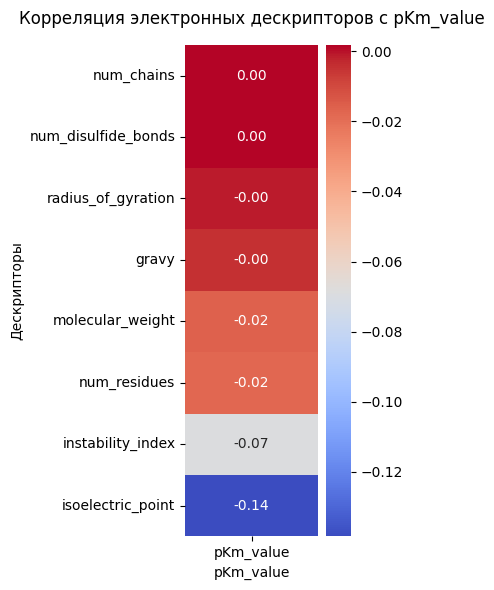

In [12]:
plt.figure(figsize=(4, 6))
sns.heatmap(
    desc_corr.to_frame(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True
)
plt.title('Корреляция электронных дескрипторов с pKm_value', pad=15)
plt.xlabel('pKm_value')
plt.ylabel('Дескрипторы')
plt.tight_layout()
plt.show()

Все представленные дескрипторы ферментов демонстрируют очень слабую или слабую линейную корреляцию с целевой переменной pKm_value. Наиболее заметная, хотя и по-прежнему слабая, взаимосвязь наблюдается у изоэлектрической точки (isoelectric_point). Остальные параметры, такие как количество цепей, дисульфидных связей, молекулярный вес, количество аминокислотных остатков и др., практически не имеют линейной связи с pKm.

In [14]:
aa_desc = ['AACount_A', 'AACount_C', 'AACount_D', 'AACount_E', 'AACount_F', 'AACount_G', 'AACount_H', 'AACount_I',
           'AACount_K', 'AACount_L', 'AACount_M', 'AACount_N', 'AACount_P', 'AACount_Q', 'AACount_R',
           'AACount_S', 'AACount_T', 'AACount_V', 'AACount_W', 'AACount_Y']
aa_corr = df1[aa_desc + ['pKm_value']].corr()['pKm_value'].drop('pKm_value').sort_values(ascending=False)
aa_corr

,pKm_value
AACount_W,0.059543
AACount_H,0.058131
AACount_D,0.033714
AACount_Y,0.020153
AACount_P,0.010926
AACount_N,0.006125
AACount_R,-0.000526
AACount_F,-0.007191
AACount_A,-0.010302
AACount_V,-0.013740


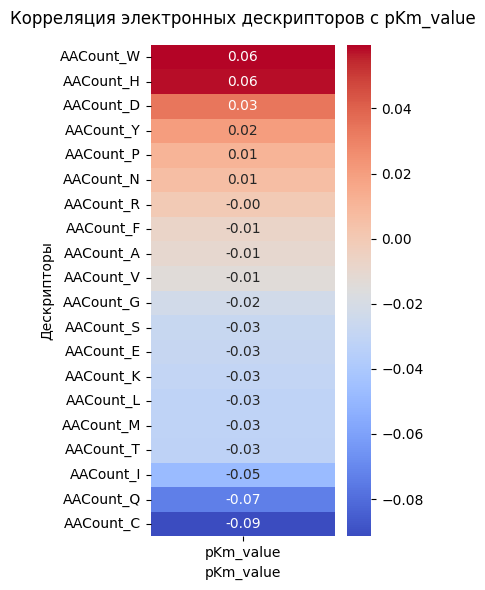

In [15]:
plt.figure(figsize=(4, 6))
sns.heatmap(
    aa_corr.to_frame(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True
)
plt.title('Корреляция электронных дескрипторов с pKm_value', pad=15)
plt.xlabel('pKm_value')
plt.ylabel('Дескрипторы')
plt.tight_layout()
plt.show()

Наблюдается положительная и отрицательная корреляция.
* Аминокислоты с положительным коэффициентом корреляции указывают на то, что увеличение их количества в последовательности фермента связано с тенденцией к увеличению pKm_value - Гистидин и Триптофан
* Аминокислоты с отрицательным коэффициентом указывают на то, что увеличение их количества связано с тенденцией к снижению pKm_value - Цистеин и Глутамин

In [16]:
df1.to_csv('df1.csv', index=False)